In [1]:
reset -fs


In [2]:
import pyspark
import findspark
findspark.init() 

import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.ticker
import matplotlib.pyplot as plt

import webbrowser

In [3]:
spark = pyspark.sql.SparkSession.builder.getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
21/12/17 02:23:19 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
21/12/17 02:23:20 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [4]:
## Importing earthquakes CSV with historical data 
earthquakes = spark.read.csv('/Users/nicholasbronson/Metis_Nick/earthquake_f.csv',
                      header='true', 
                      inferSchema='true', 
                      sep=',')

earthquakes.printSchema()



root
 |-- time: timestamp (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- depth: double (nullable = true)
 |-- mag: double (nullable = true)
 |-- magType: string (nullable = true)
 |-- nst: integer (nullable = true)
 |-- gap: double (nullable = true)
 |-- dmin: double (nullable = true)
 |-- rms: double (nullable = true)
 |-- net: string (nullable = true)
 |-- id: string (nullable = true)
 |-- updated: timestamp (nullable = true)
 |-- place: string (nullable = true)
 |-- type: string (nullable = true)
 |-- horizontalError: double (nullable = true)
 |-- depthError: double (nullable = true)
 |-- magError: double (nullable = true)
 |-- magNst: integer (nullable = true)
 |-- status: string (nullable = true)
 |-- locationSource: string (nullable = true)
 |-- magSource: string (nullable = true)



## Data Exploration and Cleaning in Spark  

In [5]:
earthquakes.show(5)

+--------------------+----------+------------+-----+----+-------+---+------+--------+------+---+----------+--------------------+--------------------+----------+---------------+----------+--------+------+---------+--------------+---------+
|                time|  latitude|   longitude|depth| mag|magType|nst|   gap|    dmin|   rms|net|        id|             updated|               place|      type|horizontalError|depthError|magError|magNst|   status|locationSource|magSource|
+--------------------+----------+------------+-----+----+-------+---+------+--------+------+---+----------+--------------------+--------------------+----------+---------------+----------+--------+------+---------+--------------+---------+
|2021-12-11 10:49:...|32.3831673|-116.8099976|13.96| 1.7|     ml| 34| 216.0|  0.1423|  0.19| ci|ci39885439|2021-12-11 10:52:...|21km NNE of Primo...|earthquake|           0.45|      0.66|   0.241|     8|automatic|            ci|       ci|
|2021-12-11 10:39:...|33.9278333|   -118.264

In [6]:
eqs_filtered = earthquakes.filter(earthquakes.mag > 4)

eqs_filtered.show(30)

+--------------------+--------+---------+-----+---+-------+----+-----+-----+----+---+----------+--------------------+--------------------+----------+---------------+----------+--------+------+--------+--------------+---------+
|                time|latitude|longitude|depth|mag|magType| nst|  gap| dmin| rms|net|        id|             updated|               place|      type|horizontalError|depthError|magError|magNst|  status|locationSource|magSource|
+--------------------+--------+---------+-----+---+-------+----+-----+-----+----+---+----------+--------------------+--------------------+----------+---------------+----------+--------+------+--------+--------------+---------+
|2021-12-09 10:31:...| 30.0785|-113.6312| 10.0|4.6|     mb|null|149.0|1.421|0.95| us|us6000gav6|2021-12-09 11:17:...|92 km W of La Lib...|earthquake|            3.9|       1.8|   0.069|    67|reviewed|            us|       us|
|2021-12-08 08:45:...| 38.6552| -97.4462|  3.0|4.3|    mwr|null| 68.0|0.735|0.46| us|us6000g

In [7]:
type(earthquakes)

pyspark.sql.dataframe.DataFrame

In [8]:
eqs_filtered2 = earthquakes.filter(earthquakes.mag > 7)

eqs_filtered2.show(5)

+--------------------+----------+------------+-----+---+-------+---+-----+-------+----+---+----------+--------------------+--------------------+----------+---------------+----------+--------+------+--------+--------------+---------+
|                time|  latitude|   longitude|depth|mag|magType|nst|  gap|   dmin| rms|net|        id|             updated|               place|      type|horizontalError|depthError|magError|magNst|  status|locationSource|magSource|
+--------------------+----------+------------+-----+---+-------+---+-----+-------+----+---+----------+--------------------+--------------------+----------+---------------+----------+--------+------+--------+--------------+---------+
|2019-07-05 23:19:...|   35.7695|-117.5993333|  8.0|7.1|     mw| 77| 43.0|0.04616|0.22| ci|ci38457511|2021-11-18 00:02:...|2019 Ridgecrest E...|earthquake|           0.19|     31.61|    null|     0|reviewed|            ci|       ci|
|2010-04-04 18:40:...|32.2861667|-115.2953333|9.987|7.2|     mw| 10|

In [9]:
earthquakes.createOrReplaceTempView("eqs")

In [10]:
query = """
        SELECT time, latitude
        FROM eqs
        WHERE mag > 6.5 
        """
spark.sql(query).show(2)

+--------------------+--------+
|                time|latitude|
+--------------------+--------+
|2019-07-05 23:19:...| 35.7695|
|2015-09-13 04:14:...|  24.913|
+--------------------+--------+
only showing top 2 rows



In [11]:
query = """
        SELECT time, latitude
        FROM eqs
        WHERE time = 'time'
        """
spark.sql(query).show(10)

+----+--------+
|time|latitude|
+----+--------+
+----+--------+



In [12]:
earthquakes.count()

869141

In [13]:
earthquakes = earthquakes.filter(earthquakes.type == "earthquake")

In [14]:
earthquakes.count()

earthquakes.printSchema()

root
 |-- time: timestamp (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- depth: double (nullable = true)
 |-- mag: double (nullable = true)
 |-- magType: string (nullable = true)
 |-- nst: integer (nullable = true)
 |-- gap: double (nullable = true)
 |-- dmin: double (nullable = true)
 |-- rms: double (nullable = true)
 |-- net: string (nullable = true)
 |-- id: string (nullable = true)
 |-- updated: timestamp (nullable = true)
 |-- place: string (nullable = true)
 |-- type: string (nullable = true)
 |-- horizontalError: double (nullable = true)
 |-- depthError: double (nullable = true)
 |-- magError: double (nullable = true)
 |-- magNst: integer (nullable = true)
 |-- status: string (nullable = true)
 |-- locationSource: string (nullable = true)
 |-- magSource: string (nullable = true)



## Converting Dataset to Pandas, Further exploration and clearning

In [15]:
df = earthquakes.toPandas()

In [16]:
df.dropna(thresh = 10, inplace=True)

In [17]:
df.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2021-12-11 10:49:51.940,32.383167,-116.809998,13.96,1.70,ml,34.0,216.00,0.142300,0.1900,...,2021-12-11 10:52:06.876,"21km NNE of Primo Tapia, B.C., MX",earthquake,0.45,0.66,0.241,8.0,automatic,ci,ci
1,2021-12-11 10:39:58.850,33.927833,-118.264500,10.30,1.32,ml,12.0,136.00,0.022120,0.2500,...,2021-12-11 10:43:36.944,"2km NW of Willowbrook, CA",earthquake,0.70,1.01,0.248,32.0,automatic,ci,ci
2,2021-12-11 10:07:03.210,33.332500,-116.196333,1.89,2.29,ml,70.0,39.00,0.099380,0.3200,...,2021-12-11 10:12:31.085,"17km SSW of Oasis, CA",earthquake,0.29,0.92,0.211,26.0,automatic,ci,ci
3,2021-12-11 09:58:09.485,38.509800,-119.538000,7.10,1.00,ml,11.0,200.86,0.077000,0.1847,...,2021-12-11 10:02:31.472,"5 km W of Walker, California",earthquake,NaN,0.80,0.340,5.0,automatic,nn,nn
4,2021-12-11 09:50:52.120,38.815834,-122.820663,2.13,1.12,md,25.0,51.00,0.009625,0.0500,...,2021-12-11 10:09:11.897,"7km NW of The Geysers, CA",earthquake,0.21,0.40,0.140,3.0,automatic,nc,nc


In [18]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2021-12-11 10:49:51.940,32.383167,-116.809998,13.96,1.70,ml,34.0,216.00,0.142300,0.1900,...,2021-12-11 10:52:06.876,"21km NNE of Primo Tapia, B.C., MX",earthquake,0.45,0.66,0.241,8.0,automatic,ci,ci
1,2021-12-11 10:39:58.850,33.927833,-118.264500,10.30,1.32,ml,12.0,136.00,0.022120,0.2500,...,2021-12-11 10:43:36.944,"2km NW of Willowbrook, CA",earthquake,0.70,1.01,0.248,32.0,automatic,ci,ci
2,2021-12-11 10:07:03.210,33.332500,-116.196333,1.89,2.29,ml,70.0,39.00,0.099380,0.3200,...,2021-12-11 10:12:31.085,"17km SSW of Oasis, CA",earthquake,0.29,0.92,0.211,26.0,automatic,ci,ci
3,2021-12-11 09:58:09.485,38.509800,-119.538000,7.10,1.00,ml,11.0,200.86,0.077000,0.1847,...,2021-12-11 10:02:31.472,"5 km W of Walker, California",earthquake,NaN,0.80,0.340,5.0,automatic,nn,nn
4,2021-12-11 09:50:52.120,38.815834,-122.820663,2.13,1.12,md,25.0,51.00,0.009625,0.0500,...,2021-12-11 10:09:11.897,"7km NW of The Geysers, CA",earthquake,0.21,0.40,0.140,3.0,automatic,nc,nc


In [19]:
df["time"]

0        2021-12-11 10:49:51.940
1        2021-12-11 10:39:58.850
2        2021-12-11 10:07:03.210
3        2021-12-11 09:58:09.485
4        2021-12-11 09:50:52.120
                   ...          
847226   2020-02-29 19:39:30.310
847227   2020-02-29 19:39:17.370
847228   2020-02-29 19:29:45.480
847229   2020-02-29 19:27:07.370
847230   2020-02-29 19:09:23.230
Name: time, Length: 847231, dtype: datetime64[ns]

In [20]:
df["year"] = df["time"].dt.year

In [21]:
df["year"].astype(int)

0         2021
1         2021
2         2021
3         2021
4         2021
          ... 
847226    2020
847227    2020
847228    2020
847229    2020
847230    2020
Name: year, Length: 847231, dtype: int64

In [22]:
mask3 = df['year'] != 2009

In [23]:
df = df[mask3]

In [24]:
year_counts = df.value_counts('year')

In [25]:
type(year_counts)

pandas.core.series.Series

In [26]:
type(year_counts)

pandas.core.series.Series

In [27]:
df.year = df.year.astype(int)

In [28]:
df.year

0         2021
1         2021
2         2021
3         2021
4         2021
          ... 
847226    2020
847227    2020
847228    2020
847229    2020
847230    2020
Name: year, Length: 847190, dtype: int64

In [29]:
mask = df["year"] > 2009
df_a2009 = df[mask]
df_a2009.year

0         2021
1         2021
2         2021
3         2021
4         2021
          ... 
847226    2020
847227    2020
847228    2020
847229    2020
847230    2020
Name: year, Length: 847190, dtype: int64

In [30]:
year_groups = df.groupby([df_a2009["year"]])['year'].count()
x = df_a2009["year"].value_counts(sort=False, ascending = False)

In [31]:
type(x)

pandas.core.series.Series

In [32]:
x

2021     71778
2020     98804
2019    101297
2018     55648
2017     66922
2016     60632
2015     62988
2014     67807
2013     64319
2012     57687
2011     59758
2010     79550
Name: year, dtype: int64

In [33]:
x = x.reindex(index=x.index[::-1])

In [34]:
x

2010     79550
2011     59758
2012     57687
2013     64319
2014     67807
2015     62988
2016     60632
2017     66922
2018     55648
2019    101297
2020     98804
2021     71778
Name: year, dtype: int64

In [35]:
x_dict = dict(x)

In [36]:
x_dict

{2010: 79550,
 2011: 59758,
 2012: 57687,
 2013: 64319,
 2014: 67807,
 2015: 62988,
 2016: 60632,
 2017: 66922,
 2018: 55648,
 2019: 101297,
 2020: 98804,
 2021: 71778}

Text(0.5, 0.98, 'Categorical Plotting')

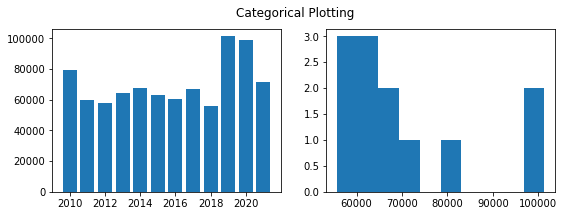

In [37]:
## Test plots, 
fig, axs = plt.subplots(1, 2, figsize=(9, 3))
axs[0].bar(x_dict.keys(), x_dict.values())
axs[1].hist(x_dict.values())
fig.suptitle('Categorical Plotting')


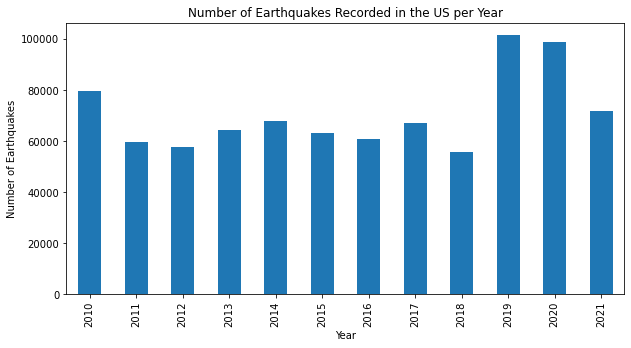

In [38]:
x.plot(kind='bar',figsize=(10,5),legend=None)
plt.title("Number of Earthquakes Recorded in the US per Year")
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")

plt.show()




In [39]:
mask2 = df_a2009["mag"] >= 5

In [40]:
df_over_5 = df_a2009[mask2]

In [41]:
y = df_over_5["year"].value_counts(sort=False, ascending = False)

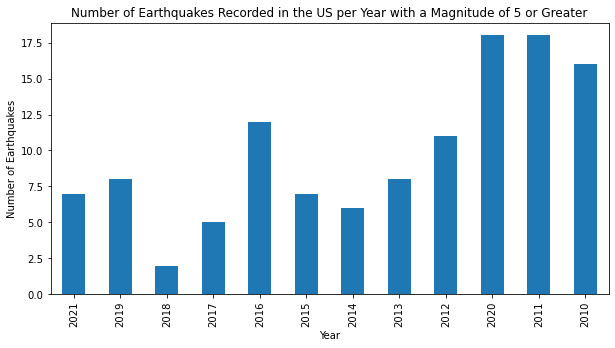

In [42]:
y.plot(kind='bar',figsize=(10,5),legend=None)
plt.title("Number of Earthquakes Recorded in the US per Year with a Magnitude of 5 or Greater")
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")

plt.show()




In [43]:
print(year_groups)

year
2010     79550
2011     59758
2012     57687
2013     64319
2014     67807
2015     62988
2016     60632
2017     66922
2018     55648
2019    101297
2020     98804
2021     71778
Name: year, dtype: int64


In [44]:
type(year_groups)

pandas.core.series.Series

In [45]:
year_groups.to_numpy()

array([ 79550,  59758,  57687,  64319,  67807,  62988,  60632,  66922,
        55648, 101297,  98804,  71778])

In [46]:
type(year_groups)

pandas.core.series.Series

In [47]:
df.iloc[19564]

time               2020-02-26 09:38:43.650000
latitude                               38.805
longitude                           -122.8245
depth                                    2.09
mag                                      0.25
magType                                    md
nst                                      10.0
gap                                      72.0
dmin                                 0.005318
rms                                      0.02
net                                        nc
id                                 nc73346305
updated            2020-02-26 22:34:04.031000
place              7km WNW of The Geysers, CA
type                               earthquake
horizontalError                          0.39
depthError                               0.82
magError                                  NaN
magNst                                    1.0
status                               reviewed
locationSource                             nc
magSource                         

In [48]:
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,year
0,2021-12-11 10:49:51.940,32.383167,-116.809998,13.96,1.70,ml,34.0,216.00,0.142300,0.1900,...,"21km NNE of Primo Tapia, B.C., MX",earthquake,0.45,0.66,0.241,8.0,automatic,ci,ci,2021
1,2021-12-11 10:39:58.850,33.927833,-118.264500,10.30,1.32,ml,12.0,136.00,0.022120,0.2500,...,"2km NW of Willowbrook, CA",earthquake,0.70,1.01,0.248,32.0,automatic,ci,ci,2021
2,2021-12-11 10:07:03.210,33.332500,-116.196333,1.89,2.29,ml,70.0,39.00,0.099380,0.3200,...,"17km SSW of Oasis, CA",earthquake,0.29,0.92,0.211,26.0,automatic,ci,ci,2021
3,2021-12-11 09:58:09.485,38.509800,-119.538000,7.10,1.00,ml,11.0,200.86,0.077000,0.1847,...,"5 km W of Walker, California",earthquake,NaN,0.80,0.340,5.0,automatic,nn,nn,2021
4,2021-12-11 09:50:52.120,38.815834,-122.820663,2.13,1.12,md,25.0,51.00,0.009625,0.0500,...,"7km NW of The Geysers, CA",earthquake,0.21,0.40,0.140,3.0,automatic,nc,nc,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847226,2020-02-29 19:39:30.310,33.649167,-116.706500,13.63,0.21,ml,17.0,73.00,0.033640,0.1000,...,"10km S of Idyllwild, CA",earthquake,0.34,0.44,0.132,8.0,reviewed,ci,ci,2020
847227,2020-02-29 19:39:17.370,33.648833,-116.705500,13.74,0.87,ml,26.0,70.00,0.033160,0.1400,...,"10km S of Idyllwild, CA",earthquake,0.28,0.38,0.177,15.0,reviewed,ci,ci,2020
847228,2020-02-29 19:29:45.480,38.792168,-122.744003,1.71,0.57,md,9.0,117.00,0.010580,0.0100,...,"2km NNE of The Geysers, CA",earthquake,0.46,0.82,NaN,1.0,automatic,nc,nc,2020
847229,2020-02-29 19:27:07.370,35.937833,-117.682667,4.08,0.85,ml,16.0,56.00,0.028060,0.0900,...,"20km E of Little Lake, CA",earthquake,0.16,0.27,0.193,7.0,reviewed,ci,ci,2020


(array([2.78663e+05, 3.42014e+05, 1.55823e+05, 5.34760e+04, 1.38000e+04,
        2.84400e+03, 4.67000e+02, 8.00000e+01, 1.40000e+01, 9.00000e+00]),
 array([0.  , 0.72, 1.44, 2.16, 2.88, 3.6 , 4.32, 5.04, 5.76, 6.48, 7.2 ]),
 <BarContainer object of 10 artists>)

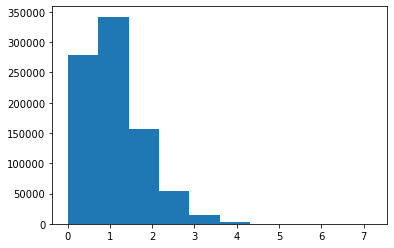

In [49]:
fig, ax = plt.subplots()

ax.hist(df['mag'])



(array([2.78663e+05, 3.42014e+05, 1.55823e+05, 5.34760e+04, 1.38000e+04,
        2.84400e+03, 4.67000e+02, 8.00000e+01, 1.40000e+01, 9.00000e+00]),
 array([0.  , 0.72, 1.44, 2.16, 2.88, 3.6 , 4.32, 5.04, 5.76, 6.48, 7.2 ]),
 <BarContainer object of 10 artists>)

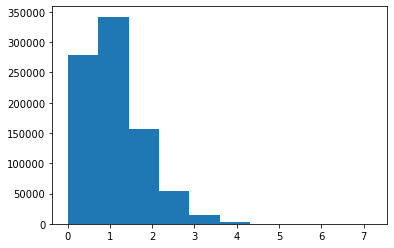

In [50]:
plt.hist(df['mag'])

In [51]:
df.to_csv('/Users/nicholasbronson/Metis_Nick/eq_df_fp.csv', index = False)

In [52]:
df["month"] = df["time"].dt.month

In [53]:
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,year,month
0,2021-12-11 10:49:51.940,32.383167,-116.809998,13.96,1.70,ml,34.0,216.00,0.142300,0.1900,...,earthquake,0.45,0.66,0.241,8.0,automatic,ci,ci,2021,12
1,2021-12-11 10:39:58.850,33.927833,-118.264500,10.30,1.32,ml,12.0,136.00,0.022120,0.2500,...,earthquake,0.70,1.01,0.248,32.0,automatic,ci,ci,2021,12
2,2021-12-11 10:07:03.210,33.332500,-116.196333,1.89,2.29,ml,70.0,39.00,0.099380,0.3200,...,earthquake,0.29,0.92,0.211,26.0,automatic,ci,ci,2021,12
3,2021-12-11 09:58:09.485,38.509800,-119.538000,7.10,1.00,ml,11.0,200.86,0.077000,0.1847,...,earthquake,NaN,0.80,0.340,5.0,automatic,nn,nn,2021,12
4,2021-12-11 09:50:52.120,38.815834,-122.820663,2.13,1.12,md,25.0,51.00,0.009625,0.0500,...,earthquake,0.21,0.40,0.140,3.0,automatic,nc,nc,2021,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847226,2020-02-29 19:39:30.310,33.649167,-116.706500,13.63,0.21,ml,17.0,73.00,0.033640,0.1000,...,earthquake,0.34,0.44,0.132,8.0,reviewed,ci,ci,2020,2
847227,2020-02-29 19:39:17.370,33.648833,-116.705500,13.74,0.87,ml,26.0,70.00,0.033160,0.1400,...,earthquake,0.28,0.38,0.177,15.0,reviewed,ci,ci,2020,2
847228,2020-02-29 19:29:45.480,38.792168,-122.744003,1.71,0.57,md,9.0,117.00,0.010580,0.0100,...,earthquake,0.46,0.82,NaN,1.0,automatic,nc,nc,2020,2
847229,2020-02-29 19:27:07.370,35.937833,-117.682667,4.08,0.85,ml,16.0,56.00,0.028060,0.0900,...,earthquake,0.16,0.27,0.193,7.0,reviewed,ci,ci,2020,2


In [54]:
lat = df['latitude'] 

In [55]:
lat.isnull

<bound method Series.isnull of 0         32.383167
1         33.927833
2         33.332500
3         38.509800
4         38.815834
            ...    
847226    33.649167
847227    33.648833
847228    38.792168
847229    35.937833
847230    38.806168
Name: latitude, Length: 847190, dtype: float64>

In [56]:
lon = df['longitude']

In [57]:
lon.isnull

<bound method Series.isnull of 0        -116.809998
1        -118.264500
2        -116.196333
3        -119.538000
4        -122.820663
             ...    
847226   -116.706500
847227   -116.705500
847228   -122.744003
847229   -117.682667
847230   -122.737167
Name: longitude, Length: 847190, dtype: float64>

In [58]:
df.to_csv('/Users/nicholasbronson/Metis_Nick/eq_df_2.csv', index = False)

In [59]:
or_boundary = df[df['latitude'].between(42,46.5) & df['longitude'].between(-130,-116.4)]


In [60]:
or_boundary

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,year,month
49,2021-12-11 01:30:41.320,46.370998,-122.296669,2.180000,2.180000,md,8.0,202.0,0.071230,0.22,...,earthquake,2.27,11.00,NaN,1.0,reviewed,uw,uw,2021,12
81,2021-12-10 17:28:41.820,46.163834,-122.954002,61.380001,2.914149,ml,11.0,219.0,0.500500,0.21,...,earthquake,3.75,4.87,0.443661,15.0,reviewed,uw,uw,2021,12
194,2021-12-09 19:26:25.100,46.200500,-122.180500,3.300000,0.110000,ml,9.0,161.0,0.003486,0.09,...,earthquake,0.48,0.78,0.112108,3.0,reviewed,uw,uw,2021,12
207,2021-12-09 18:08:10.180,46.210167,-122.181667,2.200000,0.430000,ml,10.0,153.0,0.006563,0.06,...,earthquake,0.39,0.75,0.206685,4.0,reviewed,uw,uw,2021,12
222,2021-12-09 15:27:50.710,44.633000,-124.480833,8.160000,1.670000,ml,9.0,252.0,0.494000,0.31,...,earthquake,1.45,27.18,0.169701,2.0,reviewed,uw,uw,2021,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846924,2020-03-02 17:33:56.120,46.299333,-122.226333,1.650000,0.280000,ml,7.0,156.0,NaN,0.05,...,earthquake,0.29,0.31,0.179742,4.0,reviewed,uw,uw,2020,3
847051,2020-03-01 20:36:00.920,46.099167,-118.870833,16.150000,1.060000,ml,11.0,124.0,NaN,0.06,...,earthquake,0.69,0.76,0.220742,10.0,reviewed,uw,uw,2020,3
847055,2020-03-01 19:55:22.910,46.206333,-122.053000,10.650000,0.420000,ml,12.0,188.0,NaN,0.18,...,earthquake,0.66,0.98,0.176308,6.0,reviewed,uw,uw,2020,3
847070,2020-03-01 18:05:50.750,46.136833,-122.159167,3.640000,0.360000,ml,15.0,96.0,NaN,0.18,...,earthquake,0.64,0.77,0.149955,12.0,reviewed,uw,uw,2020,3


In [61]:
max(df['time'])

Timestamp('2021-12-11 10:49:51.940000')

In [62]:
or_boundary = df[df['latitude'].between(42,46.5) & df['longitude'].between(-130,-116.4)]


In [63]:
df_small = df[(df["year"] > 2018) & (df['mag'] > 2)]

In [64]:
df_small.to_csv('/Users/nicholasbronson/Metis_Nick/eq_df_v2.csv', index = False)

In [65]:
## Not used atm, may reinstate
"""numeric_columns = data.select_dtypes(['float64', 'float32', 'int32', 'int64']).columns
print(numeric_columns)

checkbox = st.sidebar.checkbox('Reveal data')

if checkbox:
    ## If checkbox in app is checked, dataframe appears 
    st.dataframe(data=data)

st.sidebar.subheader('Plot Setup')




##Creates Plotting ability 
select_box1 = st.sidebar.selectbox(label="X axis", options = numeric_columns)
print(select_box1)
select_box2 = st.sidebar.selectbox(label="Y axis", options = numeric_columns)

sns.relplot(x=select_box1, y=select_box2, data=data)
st.pyplot()"""

'numeric_columns = data.select_dtypes([\'float64\', \'float32\', \'int32\', \'int64\']).columns\nprint(numeric_columns)\n\ncheckbox = st.sidebar.checkbox(\'Reveal data\')\n\nif checkbox:\n    ## If checkbox in app is checked, dataframe appears \n    st.dataframe(data=data)\n\nst.sidebar.subheader(\'Plot Setup\')\n\n\n\n\n##Creates Plotting ability \nselect_box1 = st.sidebar.selectbox(label="X axis", options = numeric_columns)\nprint(select_box1)\nselect_box2 = st.sidebar.selectbox(label="Y axis", options = numeric_columns)\n\nsns.relplot(x=select_box1, y=select_box2, data=data)\nst.pyplot()'

In [66]:
df.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,year,month
0,2021-12-11 10:49:51.940,32.383167,-116.809998,13.96,1.70,ml,34.0,216.00,0.142300,0.1900,...,earthquake,0.45,0.66,0.241,8.0,automatic,ci,ci,2021,12
1,2021-12-11 10:39:58.850,33.927833,-118.264500,10.30,1.32,ml,12.0,136.00,0.022120,0.2500,...,earthquake,0.70,1.01,0.248,32.0,automatic,ci,ci,2021,12
2,2021-12-11 10:07:03.210,33.332500,-116.196333,1.89,2.29,ml,70.0,39.00,0.099380,0.3200,...,earthquake,0.29,0.92,0.211,26.0,automatic,ci,ci,2021,12
3,2021-12-11 09:58:09.485,38.509800,-119.538000,7.10,1.00,ml,11.0,200.86,0.077000,0.1847,...,earthquake,NaN,0.80,0.340,5.0,automatic,nn,nn,2021,12
4,2021-12-11 09:50:52.120,38.815834,-122.820663,2.13,1.12,md,25.0,51.00,0.009625,0.0500,...,earthquake,0.21,0.40,0.140,3.0,automatic,nc,nc,2021,12


## API to Download data between most recent date and current date

In [67]:
## Finding most recent date, turning it into a website url that will call csv

m_time = max(df["time"])
max_time_string = str(m_time.year) + "-" + str(m_time.month) + "-" + str(m_time.day)
web_string = "https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&" + max_time_string + "&&minmagnitude=2&maxlatitude=50&minlatitude=24.6&maxlongitude=-65&minlongitude=-125"
download_csv_from_USGS = webbrowser.open(web_string)

## Processing 

In [68]:
##This cell will process

earthquakes_additional = spark.read.csv('/Users/nicholasbronson/Metis_Nick/eq_data_121621.csv',
                      header='true', 
                      inferSchema='true', 
                      sep=',')

earthquakes_additional = earthquakes_additional.filter(earthquakes_additional.type == "earthquake")
df_additional = earthquakes_additional.toPandas()
df_additional.dropna(thresh = 10, inplace=True)
df_additional["year"] = df_additional["time"].dt.year
df_additional["year"].astype(int)
df_additional["month"] = df_additional["time"].dt.month
df_additional["month"].astype(int)

## the cell below will create a CSV that can be uploaded to SQL and processed by the streamlit app 
## df_additional.to_csv('/Users/nicholasbronson/Metis_Nick/earthquake_up_to_date.csv', index = False)

0      12
1      12
2      12
3      12
4      12
       ..
626    11
627    11
628    11
629    11
630    11
Name: month, Length: 631, dtype: int64

In [72]:
## Run this cell to create a CSV that combines the newly aquired data and the historical data 

df_final = pd.concat([df, df_additional])
df_final.to_csv('/Users/nicholasbronson/Metis_Nick/earthquake_updated.csv', index = False)

## Reducing size of dataframe 

In [73]:
df_final = df_final[(df_final['mag'] >= 2)]

df_final.to_csv('/Users/nicholasbronson/Metis_Nick/earthquake_updated.csv', index = False)

In [74]:
## Reducing size of dataframe below, this step will not be future in future iterations, however, 
## it was necessary due to hosting data on github rather than a cloud based database.
## Future versions of this project will use a cloud based database.
df_final.drop(['locationSource', 'magSource', 'status', 'magType', 'net', 'id', 'updated', 'type', 'status'] ,axis=1, inplace = True)
df_final['mag'].astype(float)


2      2.29
12     3.50
14     2.27
24     2.60
30     2.90
       ... 
626    2.70
627    2.24
628    2.30
629    2.21
630    2.51
Name: mag, Length: 93580, dtype: float64